In [93]:
from __future__ import print_function
import collections
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

tf.compat.v1.enable_eager_execution()


In [97]:
N = 100
X = np.random.randn(N, 2)
beta = np.array([[-2.5], [3]])
y = np.dot(X, beta) + np.random.randn(N, 1)

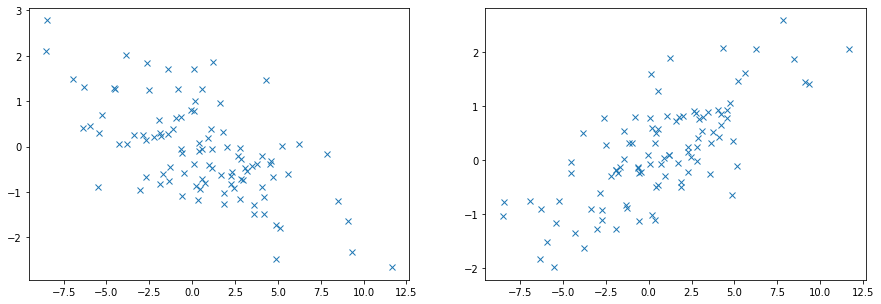

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(y, X[:,0], 'x') 
ax[1].plot(y, X[:,1], 'x') 

In [ ]:
lm = tfp.glm.Normal(
    name=None
)

In [ ]:
def challenger_joint_log_prob(D, temperature_, alpha, beta):
    rv_beta = tfd.Normal(loc=[0., 0.], scale=1000.)
    rv_sigma = tfd.HalfCauchy(loc=0., scale=1000.)
    
    logistic_p = 1.0/(1. + tf.exp(beta * tf.to_float(temperature_) + alpha))
    rv_observed = tfd.Bernoulli(probs=logistic_p)
  
    return (
        rv_alpha.log_prob(alpha)
        + rv_beta.log_prob(beta)
        + tf.reduce_sum(rv_observed.log_prob(D))
    )

In [ ]:
temperature = tf.convert_to_tensor(temperature_, dtype=tf.float32)

# State Space Models using TensorFlow Probability

In [62]:
#// monthly UK drivers KSI 1969-1984
#f = open("https://github.com/sinhrks/stan-statespace/blob/master/data/UKdriversKSI.txt", "w+")
#!/usr/bin/env python3
import requests
url = 'https://raw.githubusercontent.com/sinhrks/stan-statespace/master/data/UKdriversKSI.txt'
page = requests.get(url)
#print(page.text)
x = ['1921'] + page.text.split()[8:]
x = [float(i) for i in x]
tf.constant(x);

In [63]:
UKdrivers = [1921., 1687., 1508., 1507., 1385., 1632., 1511., 1559., 1630., 1579., 1653., 2152., 2148., 1752., 1765., 1717., 1558.,
 1575., 1520., 1805., 1800., 1719., 2008., 2242., 2478., 2030., 1655., 1693., 1623., 1805., 1746., 1795., 1926., 1619.,
 1992., 2233., 2192., 2080., 1768., 1835., 1569., 1976., 1853., 1965., 1689., 1778., 1976., 2397., 2654., 2097., 1963.,
 1677., 1941., 2003., 1813., 2012., 1912., 2084., 2080., 2118., 2150., 1608., 1503., 1548., 1382., 1731., 1798., 1779.,
 1887., 2004., 2077., 2092., 2051., 1577., 1356., 1652., 1382., 1519., 1421., 1442., 1543., 1656., 1561., 1905., 2199.,
 1473., 1655., 1407., 1395., 1530., 1309., 1526., 1327., 1627., 1748., 1958., 2274., 1648., 1401., 1411., 1403., 1394.,
 1520., 1528., 1643., 1515., 1685., 2000., 2215., 1956., 1462., 1563., 1459., 1446., 1622., 1657., 1638., 1643., 1683.,
 2050., 2262., 1813., 1445., 1762., 1461., 1556., 1431., 1427., 1554., 1645., 1653., 2016., 2207., 1665., 1361., 1506.,
 1360., 1453., 1522., 1460., 1552., 1548., 1827., 1737., 1941., 1474., 1458., 1542., 1404., 1522., 1385., 1641., 1510., 
 1681., 1938., 1868., 1726., 1456., 1445., 1456., 1365., 1487., 1558., 1488., 1684., 1594., 1850., 1998., 2079., 1494.,
 1057., 1218., 1168., 1236., 1076., 1174., 1139., 1427., 1487., 1483., 1513., 1357., 1165., 1282., 1110., 1297., 1185.,
 1222., 1284., 1444., 1575., 1737., 1763.]


In [65]:
import matplotlib.pyplot as plt

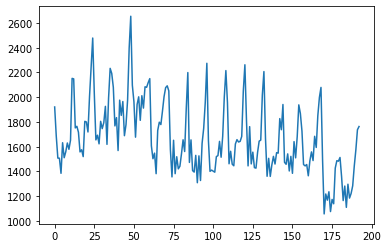

In [66]:
plt.plot(x)

## Local Level

\begin{equation}
    y_{t}=

\end{equation}

Specify prior for the 

In [78]:
level_scale_prior = tfd.Gamma(concentration=1e-3, rate=1e-3)
initial_level_prior = tfd.Normal(loc=1800, scale=1e2)
observed_time_series = x

In [79]:
ssm = tfp.sts.LocalLevel()


In [80]:
samples, kernel_results = tfp.sts.fit_with_hmc(ssm, observed_time_series)


Instructions for updating:
Do not pass `graph_parents`.  They will  no longer be used.
Instructions for updating:
Previously, `initial_step` would return the value passed to the constructor, even if that value was not `Tensor`-like. This behavior is now deprecated. In the future, it will always return a `Tensor`-like object.


/usr/local/lib/python3.6/dist-packages/tensorflow_probability/python/mcmc/sample.py:333: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


In [90]:
samples_, kernel_results_ = samples, kernel_results

print("acceptance rate: {}".format(
  np.mean(kernel_results_.inner_results.is_accepted, axis=0)))
print("posterior means: {}".format(
  {param.name: np.mean(param_draws, axis=0)
   for (param, param_draws) in zip(model.parameters, samples_)}))


AttributeError: 'TransformedTransitionKernelResults' object has no attribute 'is_accepted'

In [92]:
kernel_results

DualAveragingStepSizeAdaptationResults(inner_results=TransformedTransitionKernelResults(transformed_state=[<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([228.57195, 232.22566, 231.43738, 230.08266, 228.03139, 229.63391,
       230.09341, 228.89638, 224.81395, 223.68478, 224.87389, 224.87389,
       223.84355, 220.94823, 225.60938, 227.15666, 228.39494, 229.87386,
       228.92491, 230.12239, 229.6224 , 230.27512, 235.55016, 234.797  ,
       236.89296, 237.34178, 236.62718, 236.10094, 236.85211, 237.14919,
       240.29729, 242.66583, 243.26599, 241.75963, 239.76714, 239.76714,
       242.2564 , 238.88495, 240.32407, 240.32407, 235.62096, 235.9143 ,
       233.40315, 239.33955, 239.79228, 236.83192, 237.92932, 237.92932,
       233.18585, 236.20277, 237.55026, 239.1833 , 235.5167 , 237.01335,
       239.31862, 236.71942, 237.9869 , 238.80556, 231.98973, 238.72752,
       235.12146, 235.00677, 236.2865 , 234.01468, 229.67212, 229.56807,
       227.86745, 224.2864 , 225.78404, 22